In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
import tensorflow as tf

print("\nLibraries\n-----------------------------")
print(f"OpenCV: {cv2.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Tensorflow: {tf.__version__}")


Libraries
-----------------------------
OpenCV: 3.4.2
Numpy: 1.16.2
Matplotlib: 3.0.3
Tensorflow: 1.13.1


# Understanding Greyscale Images and Conversions

To understand how images are converted to greyscale, the different types of conversion, and what this specifically entails, here we provide some examples of images and conversions to try and clarify the different operations.

For this demonstration we take and RGB image of an archaeological cut mark from Fuente Nueva 3 (watermarked, because this data is unpublished), which we have already converted to 'greyscale' in photoshop using two different methods:

* **Image > Mode > Grayscale**
* **Image > Adjustments > Black & White**

For both conversions, we used the default setting. We assume that the authors of the original DS1, DS2 and DS3 datasets performed RGB to Greyscale conversion using photoshop, however we have no idea whether this was actually done in this way because the authors of the datasets provide no indication about how the images were processed (another example of 0 transparency in publishing practices). Given the original authors' use of the term "black and white" in their publications, we are going to assume from now on that they used the **Image > Adjustments > Black & White** option.

If we load the images (below) and visualise them, we can see that there are slight differences. We can also see in all cases that all three images remain to have 3 channels (we have appended the images shape at the end of each title)

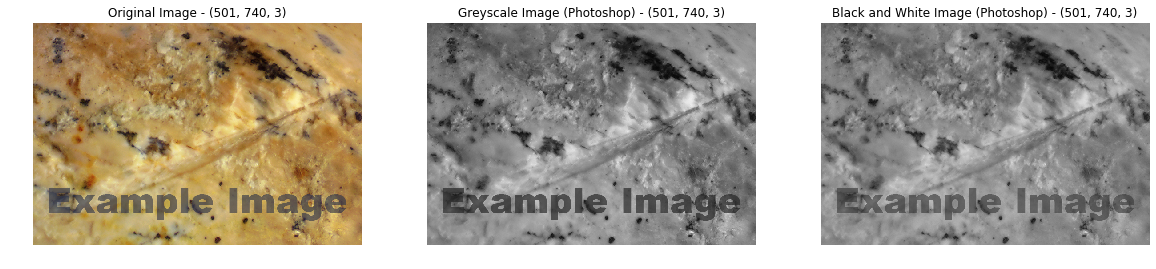

In [88]:
original_image = cv2.imread("Example_Image.png", cv2.IMREAD_COLOR)
photoshop_greyscale_image = cv2.imread("Example_Photoshop_Greyscale.png", cv2.IMREAD_COLOR)
photoshop_b_w_image = cv2.imread("Example_Photoshop_Black_and_White.png", cv2.IMREAD_COLOR)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title(f"Original Image - {original_image.shape}")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(photoshop_greyscale_image, cv2.COLOR_BGR2RGB))
plt.title(f"Greyscale Image (Photoshop) - {photoshop_greyscale_image.shape}")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(photoshop_b_w_image, cv2.COLOR_BGR2RGB))
plt.title(f"Black and White Image (Photoshop) - {photoshop_b_w_image.shape}")
plt.axis('off')
plt.show()

If we now visualise the contents of the top corner's pixel values for the R channel we can see that all three images have different numeric values

In [89]:
print(original_image[1:3,1:3,0])

[[63 64]
 [61 63]]


In [90]:
print(photoshop_greyscale_image[1:3,1:3,0])

[[87 89]
 [85 84]]


In [91]:
print(photoshop_b_w_image[1:3,1:3,0])

[[102 103]
 [ 99  99]]


Using the following line of code, we can also see that the R=G=B rule also holds for both versions of the greyscale images produced by photoshop

In [92]:
print(photoshop_greyscale_image[1:3,1:3,0] == photoshop_greyscale_image[1:3,1:3,1])
print(photoshop_greyscale_image[1:3,1:3,0] == photoshop_greyscale_image[1:3,1:3,2])
print(photoshop_greyscale_image[1:3,1:3,1] == photoshop_greyscale_image[1:3,1:3,2])

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


In [93]:
print(photoshop_b_w_image[1:3,1:3,0] == photoshop_b_w_image[1:3,1:3,1])
print(photoshop_b_w_image[1:3,1:3,0] == photoshop_b_w_image[1:3,1:3,2])
print(photoshop_b_w_image[1:3,1:3,1] == photoshop_b_w_image[1:3,1:3,2])

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


We have to admit however that we have not checked the photoshop documentation to understand what the difference between these two conversions are, however we can clearly see that there are differences.

### Manually carry out conversions

The idea of a 3 channel 8 bit greyscale image is that the pixel values of the Red channel, Green channel and Blue channel are all the same (R=G=B). We can manually see what happens if we simply set all the pixel values to be the same in the following code:

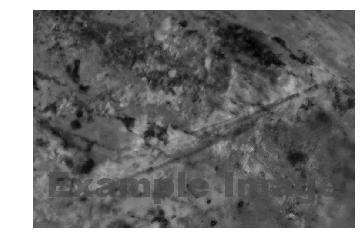

In [94]:
new_image = original_image.copy()
new_image[:,:,1] = original_image[:,:,0]
new_image[:,:,2] = original_image[:,:,0]

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title("")
plt.axis('off')
plt.show()

However this doesn't take into consideration the different weights the differnt channels have on the creation of the image. We therefore typically perform a weighted conversion of pixel values following the formula:

$$ Y = 0.299 R + 0.587 G + 0.114 B$$

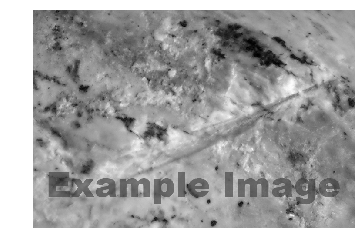

[[93.611 95.899]
 [92.443 92.34 ]]


In [95]:
R = original_image[:,:,0]
G = original_image[:,:,1]
B = original_image[:,:,2]

Y = (R * 0.299) + (G * 0.587) + (B * 0.114)

plt.imshow(Y, cmap = "gray")
plt.title("")
plt.axis('off')
plt.show()

print(Y[1:3, 1:3])

This image is now a single channel greyscale image, however it still does not resemble the output of photoshop (which may be another reason why authors should clarify how the greyscale conversion is performed to ensure reproducibility).

### Carry out conversions using OpenCV

If we perform the conversion using OpenCV, we get a very single channel image:

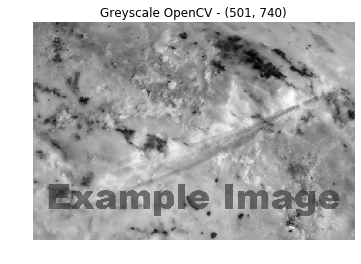

[[108 111]
 [106 106]]


In [96]:
# do the same in OpenCV

gray_default = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_default, cmap = "gray")
plt.title(f"Greyscale OpenCV - {gray_default.shape}")
plt.axis('off')
plt.show()

print(gray_default[1:3,1:3])

### Comparing all versions of the same image

It is important to point out that all images are technically grayscale, however each method of conversion is different, while the shape and nature of the corresponding tensors is completely different:

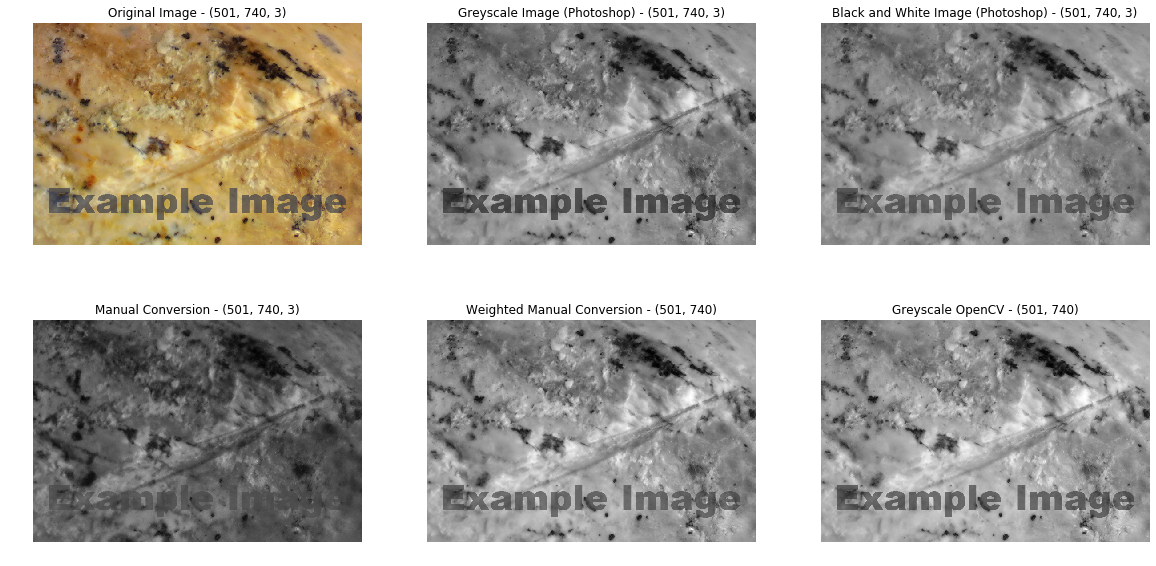

In [97]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title(f"Original Image - {original_image.shape}")
plt.axis("off")
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(photoshop_greyscale_image, cv2.COLOR_BGR2RGB))
plt.title(f"Greyscale Image (Photoshop) - {photoshop_greyscale_image.shape}")
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(photoshop_b_w_image, cv2.COLOR_BGR2RGB))
plt.title(f"Black and White Image (Photoshop) - {photoshop_b_w_image.shape}")
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title(f"Manual Conversion - {new_image.shape}")
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(Y, cmap = "gray")
plt.title(f"Weighted Manual Conversion - {Y.shape}")
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(gray_default, cmap = "gray")
plt.title(f"Greyscale OpenCV - {gray_default.shape}")
plt.axis('off')

plt.show()

This raises a number of different issues:
* The images produced by photoshop remain to have 3 channels, however they are grayscale because R=G=B. For this reason, a form of dimensionality reduction has arguably been done, however the size of the images has not changed, therefore the number of numeric values remains the same (see bellow to how this effects the computational component of CNNs).
* There are many means of performing greyscale conversion (we have only presented a handful here), and each produce different results. If the authors of the datasets either (A) do not provide precise details about how they have processed their images, we will never be able to replicate results, and this may have an effect on the results of classification tasks on archaeological materials by other authors if trying to use the weights of CNNs trained on either DS1, DS2 or DS3. (B) If the authors do not describe in detail how their greyscale conversion has been carried out, then they should upload the original RGb images, as opposed to the already preprocessed images that are available online.

# Effect of Image Size on CNN Weights

As a proof of concept that there is an impact of the number of channels on the size and weights of a neural network, we simply present here examples of the number of weights involved in the first convolutional layer of Jason2 when trained on DS1. Note that if channels were truly single-channel greyscale images, then the first convolutional layer would have 320 weights. In the case of a greyscale image where R=G=B, then the layer would have 896 weights.

In [5]:
single_channel_model = Sequential()
single_channel_model.add(
  Conv2D(
    32,
    kernel_size = (3,3),
    strides = (2,2),
    activation = "relu",
    padding = "same",
    input_shape = (80, 400, 1)
  )
)
single_channel_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 200, 32)       320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [7]:
three_channel_model = Sequential()
three_channel_model.add(
  Conv2D(
    32,
    kernel_size = (3,3),
    strides = (2,2),
    activation = "relu",
    padding = "same",
    input_shape = (80, 400, 3)
  )
)
three_channel_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 40, 200, 32)       896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
